In [284]:
import csv
def getPoints(file_name):
    with open (file_name, 'r') as file_obj:
        points = []
        reader = csv.DictReader(file_obj, delimiter=',')
        for row in reader:
            coordinates = []
            for col in reader.fieldnames:
                coordinates.append(float(row[col]))
            points.append(coordinates)
    return points

In [285]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] =[5, 5]
colorsValue = ['red', 'blue', 'green', 'yellow', 'violet']
def draw(colors, centers):
    for i in range(len(centers)):
        for point in colors[i]:
            plt.scatter(point[0], point[1], 20, colorsValue[i])
        plt.scatter(centers[i][0], centers[i][1], 20, 'black')

In [286]:
def getMins(points):
    minX = points[0][0];
    minY = points[0][1]
    for point in points:
        if (point[0] < minX):
            minX = point[0]
        if (point[1] < minY):
            minY = point[1]
    return minX, minY

In [287]:
def getMaxs(points):
    maxX = points[0][0];
    maxY = points[0][1]
    for point in points:
        if (point[0] > maxX):
            maxX = point[0]
        if (point[1] > maxY):
            maxY = point[1]
    return maxX, maxY

In [288]:
import numpy as np
def randomCenters(cluster_count):
    minX, minY = getMins(points)
    maxX, maxY = getMaxs(points)
    centers = []
    for i in range(cluster_count):
        centers.append([np.random.uniform(minX, maxX),np.random.uniform(minY, maxY) ])
    return centers

In [289]:
def updateCenters(colors, cluster_count):
    centers = [-1] * cluster_count
    for i in range(cluster_count):
        sumX = 0.0
        sumY = 0.0
        minY = colors[i][0][1]
        maxY = colors[i][0][1]
        for point in colors[i]:
        
            if (point[1] < minY):
                minY = point[1]
            if (point[1] > maxY):
                maxY = point[1]
            sumX += point[0]
            sumY += point[1]
        sumX = sumX / len(colors[i])
        sumY = sumY / len(colors[i])
        centers[i] = [sumX, sumY]
    return centers

In [290]:
def distance(point1, point2):
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2 ) ** 0.5

In [291]:
def getMinCenter(point, centers):
    minDist = distance(point, centers[0])
    ind = 0
    for i in range(len(centers)):
        dist = distance(point, centers[i])
        if ( dist < minDist):
            minDist = dist
            ind = i
    return ind

In [292]:
def setColors(points, centers):
    colors = []
    for i in range(len(centers)):
        colors.append([])
    for point in points:
        indMinCenter = getMinCenter(point, centers)
        colors[indMinCenter].append(point)
    return colors

In [293]:
def kMeans(points, cluster_count):
    centers = randomCenters(cluster_count)
    while(True):
        colors = setColors(points, centers)
        newcenters = updateCenters(colors, cluster_count)
        if (newcenters == centers):
            draw(colors, centers)
            return
        else:
            centers = newcenters
            

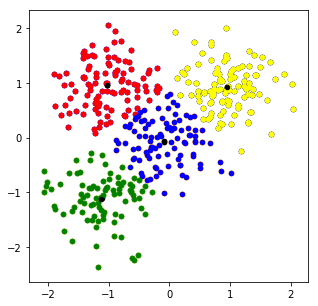

In [294]:
points = getPoints('datasets/blobs.csv')
for i in range(2, 6):
    kMeans(points, k)